In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

2.780195441700016 -105.80715351038876
-55.772109781012965 41.51526452389885
89.82637695450057 -63.65461916567715
-77.52654763067848 119.56205022567758
27.734442194093802 -5.491696560956598
-73.59699998324902 -114.0861848494143
-42.02961615869035 -72.21038487765982
-88.46113156290075 -106.30428803038815
-18.67744776122524 74.23892513569336
-69.16465415750642 -79.31715747102422
-13.816545733541545 -23.470667342876396
-50.51118773629199 -109.28193961967676
-69.00464378781797 36.07340717695183
62.25969370906438 -44.232326171680484
18.339528951203135 -95.01768240046451
5.437904659413263 -125.30197221414296
17.767531522651737 56.317005634160864
-70.51111426120941 -109.64378163360195
-62.12638654471546 -144.4919324055236
-20.398915093950848 158.7211042900019
-60.27761879114445 -87.40472107555533
6.967597309750559 1.042895248541015
-3.217168465585928 139.9615825758098
-53.980378350249964 -111.64347969413943
89.9878772927866 152.0184652952932
-83.98846893983244 54.73391815450003
63.977177861204

25.827312605354592 126.66017361218337
12.958160089319676 -41.377135232521425
-84.27939197666623 -142.88079317581708
68.27359119220733 -106.47543865002899
21.67069354879979 -43.57476351786701
-41.16555381777218 151.66597433703794
-0.3879760323408732 177.78628059934653
65.5499510698661 -126.02176983382193
-25.90250074535247 165.46299419590468
51.12661331412497 29.11497853229875
-21.33448888914714 -34.4189735412524
69.85955928498618 -26.031579925371403
-32.717297032510196 63.682986105361806
-1.253502061958656 74.02836927068847
-76.21816871681831 103.32463188452232
22.633778601879655 60.3061711877383
63.081526881149955 167.7460859364151
16.72858926981492 -178.90890876322322
28.23080221244922 -80.1650807171663
7.360582528109688 -173.9534649944752
-66.655435098153 -150.24965992801222
61.58939725887021 -77.26443315718426
78.37306096538279 139.46303901198428
-21.052078216264178 107.18178885788399
63.23673970718298 22.884164775983947
-38.58721090560265 -34.81478461254778
39.51881033830401 -116.

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | acapulco
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | narsaq
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | tarudant
City not found. Skipping...
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | puerto montt
Processing Record 8 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | catemaco
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | poum
Processing Record 18 of Set 1 | notse
Processing Record 19 of Set 1 | vanimo
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | attawapiskat
City not found. Skipping...
Proce

Processing Record 38 of Set 4 | adrar
Processing Record 39 of Set 4 | polohy
Processing Record 40 of Set 4 | dongsheng
Processing Record 41 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | muros
Processing Record 45 of Set 4 | fort nelson
Processing Record 46 of Set 4 | uruguaiana
Processing Record 47 of Set 4 | chagda
City not found. Skipping...
Processing Record 48 of Set 4 | dickinson
Processing Record 49 of Set 4 | lakes entrance
Processing Record 50 of Set 4 | emba
Processing Record 1 of Set 5 | rawson
Processing Record 2 of Set 5 | beberibe
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | cienfuegos
Processing Record 5 of Set 5 | dunedin
Processing Record 6 of Set 5 | gaoyou
Processing Record 7 of Set 5 | oyama
Processing Record 8 of Set 5 | mezen
Processing Record 9 of Set 5 | lebanon
Processing Record 10 of Set 5 | chuy
Processing Record 11 of Set 5

Processing Record 27 of Set 8 | carolina
Processing Record 28 of Set 8 | kamogawa
Processing Record 29 of Set 8 | clyde river
Processing Record 30 of Set 8 | seddon
Processing Record 31 of Set 8 | dryden
Processing Record 32 of Set 8 | namatanai
Processing Record 33 of Set 8 | bousse
Processing Record 34 of Set 8 | pangnirtung
Processing Record 35 of Set 8 | viedma
Processing Record 36 of Set 8 | gumdag
Processing Record 37 of Set 8 | noshiro
Processing Record 38 of Set 8 | khokholskiy
City not found. Skipping...
Processing Record 39 of Set 8 | ekibastuz
Processing Record 40 of Set 8 | baiyin
Processing Record 41 of Set 8 | taseyevo
Processing Record 42 of Set 8 | tres picos
Processing Record 43 of Set 8 | lamar
Processing Record 44 of Set 8 | tateyama
Processing Record 45 of Set 8 | mindyak
Processing Record 46 of Set 8 | alofi
Processing Record 47 of Set 8 | tambilil
Processing Record 48 of Set 8 | kenai
Processing Record 49 of Set 8 | lompoc
Processing Record 50 of Set 8 | san patri

Processing Record 13 of Set 12 | bud
Processing Record 14 of Set 12 | mau
Processing Record 15 of Set 12 | sladkovo
Processing Record 16 of Set 12 | collie
Processing Record 17 of Set 12 | robertsport
Processing Record 18 of Set 12 | ayios petros
City not found. Skipping...
Processing Record 19 of Set 12 | somerset east
Processing Record 20 of Set 12 | sungaipenuh
Processing Record 21 of Set 12 | formosa do rio preto
Processing Record 22 of Set 12 | piranhas
Processing Record 23 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 24 of Set 12 | jipijapa
Processing Record 25 of Set 12 | van
Processing Record 26 of Set 12 | korla
Processing Record 27 of Set 12 | otradnoye
Processing Record 28 of Set 12 | roma
Processing Record 29 of Set 12 | batagay-alyta
Processing Record 30 of Set 12 | dauphin
Processing Record 31 of Set 12 | hoi an
Processing Record 32 of Set 12 | madisonville
Processing Record 33 of Set 12 | kyren
Processing Record 34 of Set 12 | sumbe
Processing 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Acapulco,16.8634,-99.8901,82.22,69,100,16.11,MX,2022-06-15 19:37:03
1,East London,-33.0153,27.9116,55.11,61,48,21.85,ZA,2022-06-15 19:41:34
2,Narsaq,60.9167,-46.0500,53.82,66,10,7.18,GL,2022-06-15 19:41:35
3,Albany,42.6001,-73.9662,85.46,43,84,3.00,US,2022-06-15 19:41:35
4,Punta Arenas,-53.1500,-70.9167,46.51,61,75,25.32,CL,2022-06-15 19:39:41
5,Puerto Montt,-41.4698,-72.9447,52.63,76,75,3.44,CL,2022-06-15 19:41:22
6,Georgetown,5.4112,100.3354,78.89,91,40,1.14,MY,2022-06-15 19:38:52
7,Castro,-24.7911,-50.0119,60.73,74,65,2.17,BR,2022-06-15 19:41:36
8,Port Alfred,-33.5906,26.8910,53.64,73,58,20.54,ZA,2022-06-15 19:41:36
9,Nanortalik,60.1432,-45.2371,40.75,79,42,10.07,GL,2022-06-15 19:41:37


In [18]:
# Recall Column names
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [21]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_df = city_data_df[new_column_order]
city_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Acapulco,MX,2022-06-15 19:37:03,16.8634,-99.8901,82.22,69,100,16.11
1,East London,ZA,2022-06-15 19:41:34,-33.0153,27.9116,55.11,61,48,21.85
2,Narsaq,GL,2022-06-15 19:41:35,60.9167,-46.0500,53.82,66,10,7.18
3,Albany,US,2022-06-15 19:41:35,42.6001,-73.9662,85.46,43,84,3.00
4,Punta Arenas,CL,2022-06-15 19:39:41,-53.1500,-70.9167,46.51,61,75,25.32


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

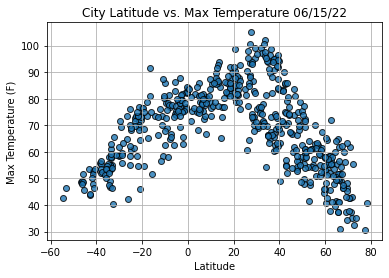

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

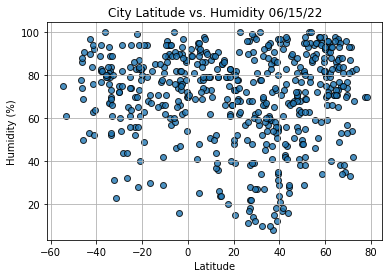

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

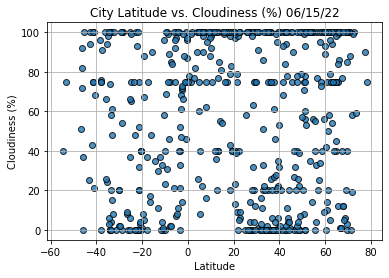

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

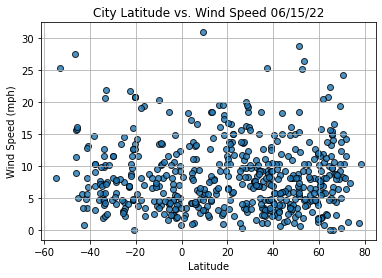

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()